In [1]:
#Importing Libraries

In [2]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [3]:
!pip install tensorflow

In [4]:
#Extract Filenames from Folder

In [5]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    
    

In [6]:
len(filenames)

44441

In [7]:
#Importing ResNet50 Model and Cofiguration

In [8]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [9]:
#Extracting Fetaures from Image

In [10]:
img = image.load_img('images/1529.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step


array([0.01742963, 0.05235101, 0.00249536, ..., 0.00967024, 0.03570655,
       0.03699992], dtype=float32)

In [11]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result


In [12]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


array([0.        , 0.01761617, 0.00171604, ..., 0.01247241, 0.02726403,
       0.06899223], dtype=float32)

In [13]:
image_features = []
for file in filenames[0:10]:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


[array([0.        , 0.01761617, 0.00171604, ..., 0.01247241, 0.02726403,
        0.06899223], dtype=float32),
 array([0.        , 0.03648945, 0.        , ..., 0.00997915, 0.02375535,
        0.04649904], dtype=float32),
 array([0.        , 0.03507714, 0.00732278, ..., 0.00283508, 0.        ,
        0.05435886], dtype=float32),
 array([0.00232165, 0.05030549, 0.00747744, ..., 0.00346687, 0.03391024,
        0.04565736], dtype=float32),
 array([0.00306834, 0.06240455, 0.        , ..., 0.00170625, 0.02032888,
        0.0583326 ], dtype=float32),
 array([0.        , 0.1046918 , 0.00198066, ..., 0.        , 0.03033055,
        0.02712929], dtype=float32),
 array([0.        , 0.12438457, 0.01465612, ..., 0.00289705, 0.0405516 ,
        0.06534589], dtype=float32),
 array([0.        , 0.09169196, 0.01569913, ..., 0.        , 0.00503582,
        0.0456004 ], dtype=float32),
 array([0.        , 0.09545271, 0.01153319, ..., 0.00073009, 0.04513267,
        0.07661071], dtype=float32),
 array([0.

In [14]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [15]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [16]:
#Loading Pickle Files

In [17]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [18]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [19]:
np.array(Image_features).shape

(10, 2048)

In [20]:
#Finidng Simialar Images

In [21]:
neighbors = NearestNeighbors(n_neighbors=10, algorithm='brute', metric='euclidean')

In [22]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=10)

In [23]:
input_image = extract_features_from_images('images/1529.jpg', model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


In [24]:
distance, indices = neighbors.kneighbors([input_image], n_neighbors=10)



In [25]:
indices[0]

array([9, 3, 8, 5, 7, 6, 4, 0, 1, 2], dtype=int64)

In [26]:
from IPython.display import Image

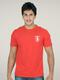

In [27]:
Image('1529.jpg')

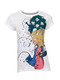

In [28]:
Image(filenames[indices[0][4]])

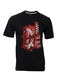

In [29]:
Image(filenames[indices[0][2]])

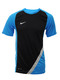

In [30]:
Image(filenames[indices[0][3]])

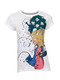

In [31]:
Image(filenames[indices[0][4]])

In [32]:
# Ensure the index is within bounds
if len(indices[0]) < 5:
	display(Image(filenames[indices[0][5]]))
else:

	print("Index 5 is out of bounds for the indices array.")

Index 5 is out of bounds for the indices array.
